In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('shm_data\\tension.csv')

In [3]:
x_train = list(df.values)
x_train.pop(0)
x_train = np.array(x_train)
x_train = (x_train - x_train.mean()) / x_train.std()
x_train.shape

(4000, 40)

In [4]:
y_train = np.array([i for i in range(40) for j in range(100)])
y_train.shape

(4000,)

In [5]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [6]:
def training_model(iteration, epochs, batch_size, shuffle):
    weights_list =[]
    
    for i in range(iteration):
        
        print('Iteration {}'.format(i+1))
        model = Sequential([
            Flatten(input_shape=(40,)),
            Dense(1000, activation='sigmoid'),
            Dense(300, activation='sigmoid'),
            Dense(40, activation='softmax'),
        ])

        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, shuffle=shuffle, verbose=0)
        
        weights = model.get_weights()
        weights_list.append(weights[5])
        
    return weights_list

In [7]:
import matplotlib.pyplot as plt

In [8]:
def plot_weight(weights_list):
    for i, weights in enumerate(weights_list):
        plt.title(i+1)
        plt.plot(weights)
        plt.show()

In [9]:
def find_max_weight(weights_list, max_count):
    wei_list = []
    for i, weights in enumerate(weights_list):
        w_list = list(weights)
        w_list.sort(reverse=True)
        
        w_list2 = list(weights)
        
        print('Epoch {}'.format(i+1))
        
        we_list = []
        for i in range(max_count):
            we_list.append(w_list2.index(w_list[i]))
            print(w_list2.index(w_list[i]), end = ' ')
        print(' ')
        wei_list.append(we_list)
    return wei_list

In [10]:
weights_list = training_model(10, 200, 100, True)

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10


In [16]:
tmp = weights_list
for i, weight in enumerate(weights_list):
    weights_list[i] = abs(weight)
    
weights_list

[array([0.00077123, 0.02190634, 0.00351169, 0.00598249, 0.00090764,
        0.03116649, 0.01712761, 0.01513529, 0.01223742, 0.00877925,
        0.01236093, 0.00893549, 0.01166526, 0.01057496, 0.01562864,
        0.01328945, 0.00975506, 0.00812683, 0.00443803, 0.01009084,
        0.0105995 , 0.01004441, 0.00321543, 0.005968  , 0.00465253,
        0.02490476, 0.00705048, 0.01120798, 0.00331347, 0.00355312,
        0.00675884, 0.0204808 , 0.01580483, 0.02202403, 0.01178463,
        0.0100732 , 0.00667681, 0.01310622, 0.00115605, 0.01467718],
       dtype=float32),
 array([0.00408348, 0.0079991 , 0.01356393, 0.00078932, 0.00750381,
        0.02369464, 0.01463806, 0.01587054, 0.00856912, 0.00528451,
        0.01622709, 0.00648553, 0.01914529, 0.00569309, 0.00510598,
        0.00947393, 0.00935787, 0.01124417, 0.00061642, 0.00747347,
        0.00579196, 0.00264886, 0.00693297, 0.0074622 , 0.0008023 ,
        0.0246028 , 0.01057724, 0.02511751, 0.00560708, 0.00992591,
        0.00730187, 0.00

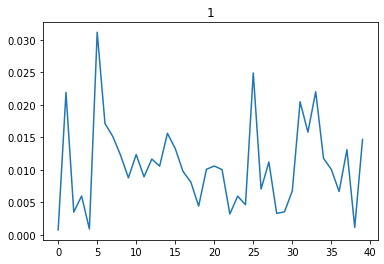

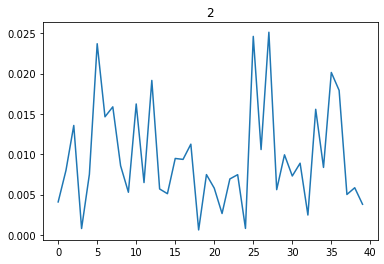

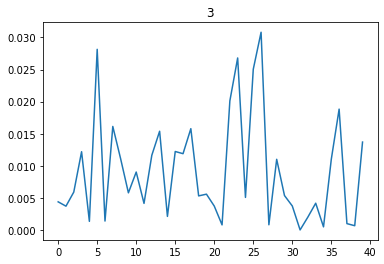

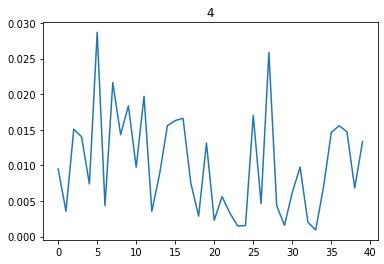

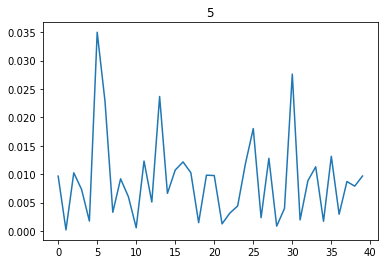

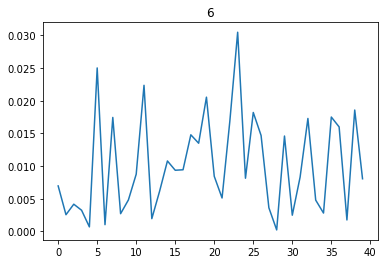

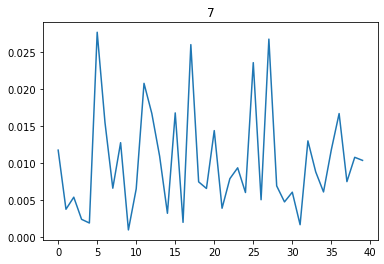

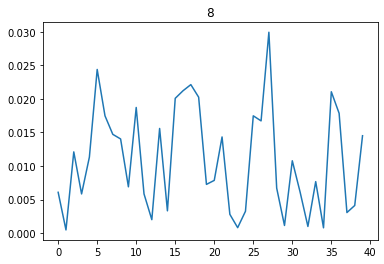

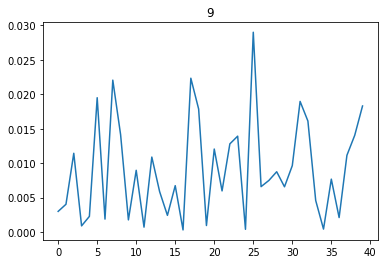

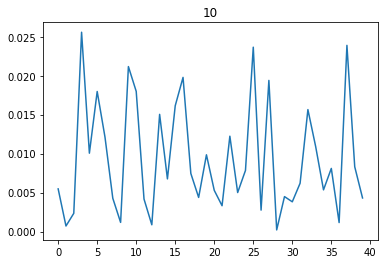

In [17]:
plot_weight(weights_list)

In [21]:
wei = find_max_weight(weights_list, 8)

Epoch 1
25 5 9 1 15 32 23 20  
Epoch 2
25 5 29 1 15 8 13 35  
Epoch 3
25 5 30 35 15 2 23 33  
Epoch 4
25 5 35 28 15 20 6 14  
Epoch 5
25 5 13 9 31 15 35 26  
Epoch 6
25 2 5 35 10 24 4 15  
Epoch 7
25 5 16 35 8 3 15 34  
Epoch 8
5 25 1 15 28 9 35 33  
Epoch 9
25 5 15 29 35 26 23 34  
Epoch 10
5 22 25 35 15 33 2 9  


In [26]:
weights_list = training_model(10, 200, 100, True)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9


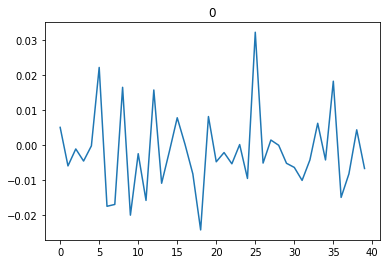

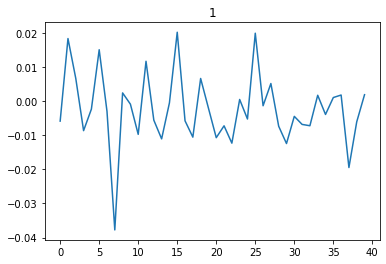

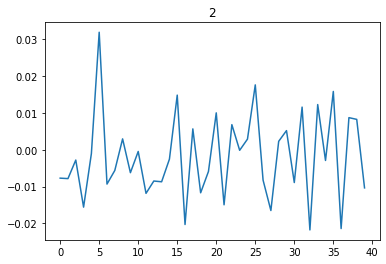

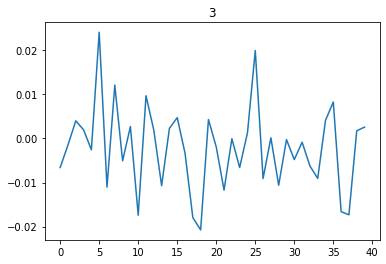

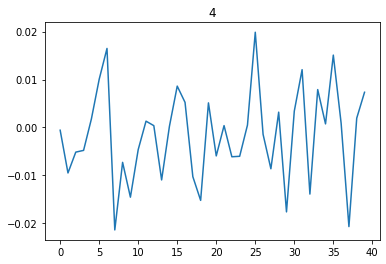

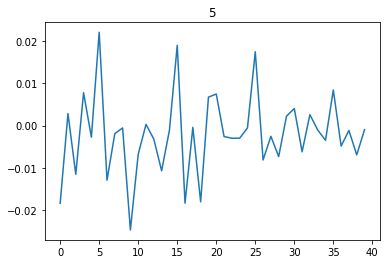

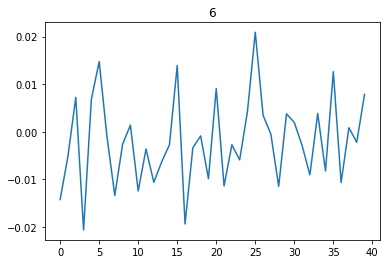

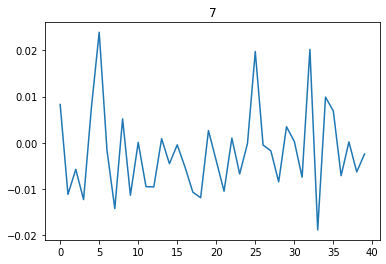

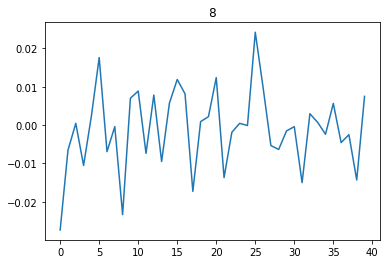

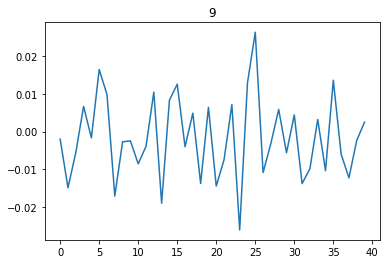

In [27]:
plot_weight(weights_list)

In [28]:
find_max_weight(weights_list, 10)

Epoch 1
25 5 35 8 12 19 15 33 0 38  
Epoch 2
15 25 1 5 11 2 18 27 8 39  
Epoch 3
5 25 35 15 33 31 20 37 38 22  
Epoch 4
5 25 7 11 35 15 19 34 2 9  
Epoch 5
25 6 35 31 5 15 33 39 16 19  
Epoch 6
5 15 25 35 3 20 19 30 1 32  
Epoch 7
25 5 15 35 20 39 2 4 24 33  
Epoch 8
5 32 25 34 0 4 35 8 29 19  
Epoch 9
25 5 20 15 26 10 16 12 39 9  
Epoch 10
25 5 35 24 15 12 6 14 22 3  


In [29]:
weights_list = training_model(10, 300, 10, True)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9


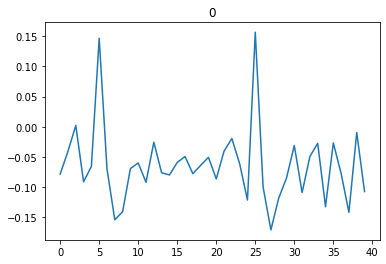

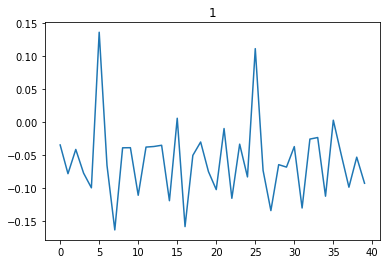

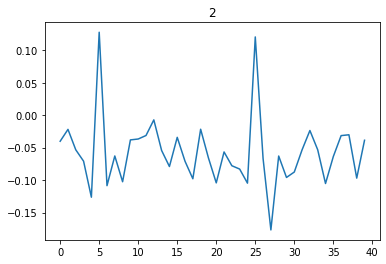

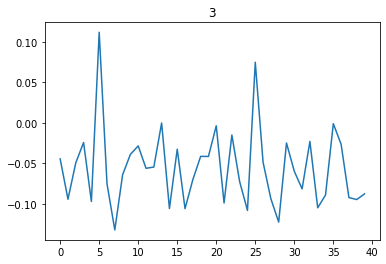

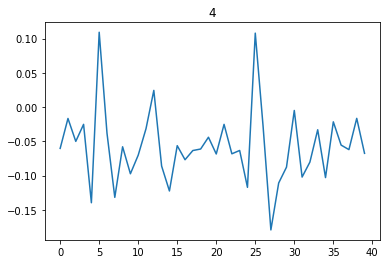

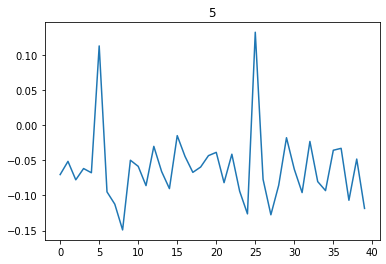

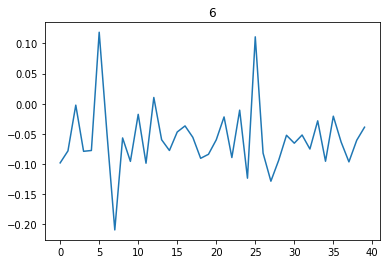

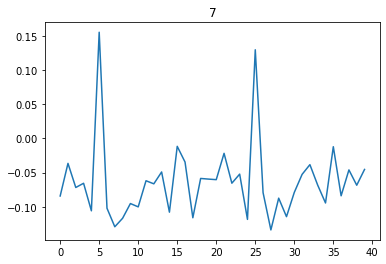

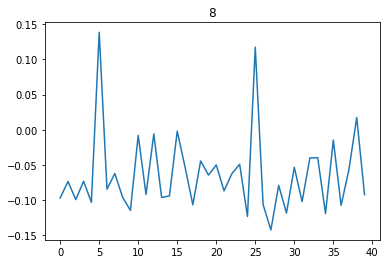

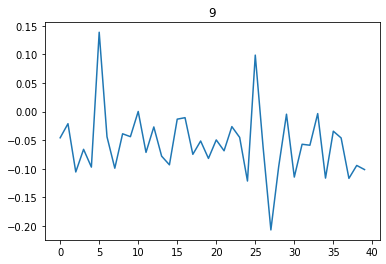

In [30]:
plot_weight(weights_list)

In [38]:
wei = find_max_weight(weights_list, 10)

Epoch 1
25 5 2 38 22 12 35 33 30 21  
Epoch 2
5 25 15 35 21 33 32 18 23 0  
Epoch 3
5 25 12 18 1 32 37 11 36 15  
Epoch 4
5 25 13 35 20 22 32 3 29 36  
Epoch 5
5 25 12 30 38 1 35 3 21 26  
Epoch 6
25 5 15 29 32 12 36 35 20 22  
Epoch 7
5 25 12 2 23 10 35 21 33 16  
Epoch 8
5 25 15 35 21 16 1 32 39 37  
Epoch 9
5 25 38 15 12 10 35 33 32 18  
Epoch 10
5 25 10 33 29 16 15 1 22 12  


In [16]:
from numpy import dot
from numpy.linalg import norm
import numpy as np

In [17]:
def cos_sim(a, b):
    return dot(a,b) / (norm(a) * norm(b))

In [22]:
wei

[[25, 5, 9, 1, 15, 32, 23, 20],
 [25, 5, 29, 1, 15, 8, 13, 35],
 [25, 5, 30, 35, 15, 2, 23, 33],
 [25, 5, 35, 28, 15, 20, 6, 14],
 [25, 5, 13, 9, 31, 15, 35, 26],
 [25, 2, 5, 35, 10, 24, 4, 15],
 [25, 5, 16, 35, 8, 3, 15, 34],
 [5, 25, 1, 15, 28, 9, 35, 33],
 [25, 5, 15, 29, 35, 26, 23, 34],
 [5, 22, 25, 35, 15, 33, 2, 9]]

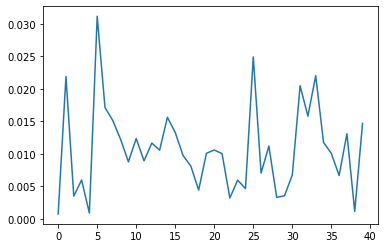

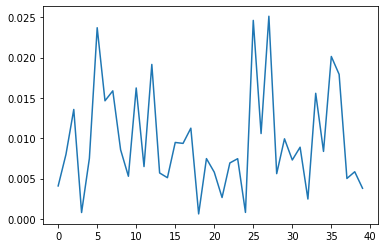

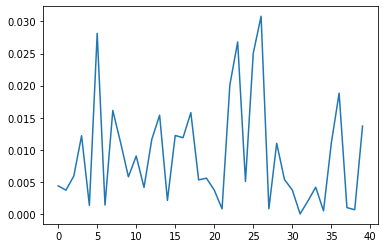

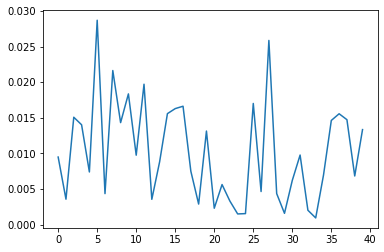

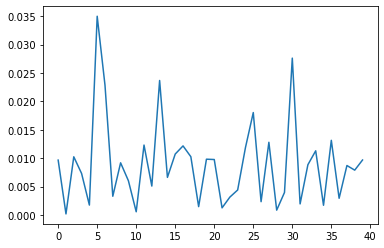

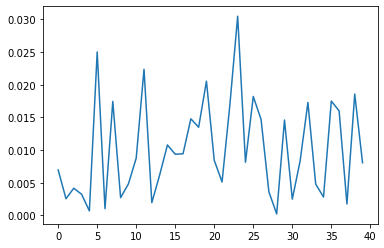

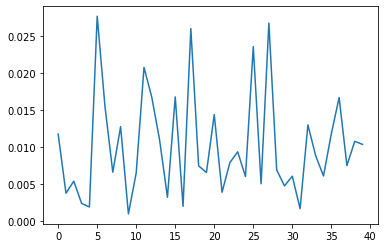

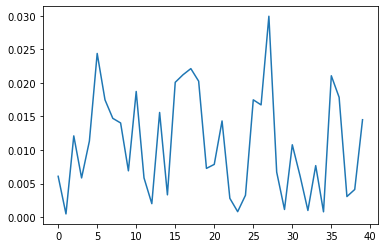

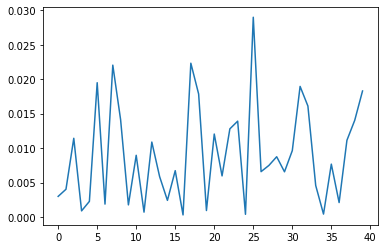

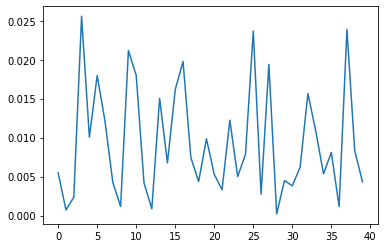

In [28]:
for w in weights_list:
    plt.plot(w)
    plt.show()

In [25]:
cnt_list = [0,0,0,0]
for we in wei:
    for w in we:
        if 0<=w<10:
            cnt_list[0] += 1
        elif 10<=w<20:
            cnt_list[1] += 1
        elif 20<=w<30:
            cnt_list[2] += 1
        elif 30<=w<40:
            cnt_list[3] += 1
cnt_list

[25, 28, 23, 24]

In [41]:
cnt_list = [0 for i in range(40)]

for we in wei:
    for w in we:
        cnt_list[w] += 1
        
for i, cnt in enumerate(cnt_list):
    print('%3d '%cnt, end = ' ')
    if i != 0 and (i+1) % 10 == 0:
        print('')

  0    1    0    1    0   10    4    6    1    2  
  3    4    2    2    2    4    4    4    2    1  
  1    0    2    2    1   10    1    6    0    0  
  1    2    4    2    0    4    5    1    2    3  


In [23]:
cos_sim(wei[0], wei[1])

0.4484004709467596

In [25]:
for w in wei:
    w.sort()

In [26]:
for i in range(10):
    for j in range(10):
        print(cos_sim(wei[i], wei[j]))
    print(' ')

1.0
0.9912444583503053
0.993066830875338
0.9944724158882683
0.9937772734321106
0.9865270891037443
0.9876421325965092
0.9958894929764236
0.9722619778676326
0.9957879081546199
 
0.9912444583503053
0.9999999999999999
0.9796968891498152
0.988880335208135
0.9831614071633935
0.9958114096675508
0.9968054928904672
0.9893752887770059
0.9542013790462873
0.9932771970430267
 
0.993066830875338
0.9796968891498152
1.0
0.9907604386640216
0.9895697698816694
0.9663762766291213
0.9809339363341673
0.9900149819765153
0.9841752684457296
0.9892817020328833
 
0.9944724158882683
0.988880335208135
0.9907604386640216
1.0
0.9959667326448088
0.9820117226682464
0.9869498475458733
0.9891695610280116
0.9806331238867558
0.9917505453808383
 
0.9937772734321106
0.9831614071633935
0.9895697698816694
0.9959667326448088
0.9999999999999999
0.9763957911944539
0.9834260034834438
0.9930720596939838
0.9824424308987266
0.9933329423704806
 
0.9865270891037443
0.9958114096675508
0.9663762766291213
0.9820117226682464
0.97639579119

In [27]:
wei

[[1, 5, 9, 15, 20, 23, 25, 32],
 [1, 5, 8, 13, 15, 25, 29, 35],
 [2, 5, 15, 23, 25, 30, 33, 35],
 [5, 6, 14, 15, 20, 25, 28, 35],
 [5, 9, 13, 15, 25, 26, 31, 35],
 [2, 4, 5, 10, 15, 24, 25, 35],
 [3, 5, 8, 15, 16, 25, 34, 35],
 [1, 5, 9, 15, 25, 28, 33, 35],
 [5, 15, 23, 25, 26, 29, 34, 35],
 [2, 5, 9, 15, 22, 25, 33, 35]]

In [32]:
len(weights_list), weights_list[8].shape

(10, (40,))

In [11]:
save_weights_list = weights_list

In [12]:
s_sort_list = []
save_weights_list = weights_list
for weights in weights_list:
    temp = list(weights)
    weights = sorted(weights, reverse=True)
    
    sort_list = []
    for weight in weights:
        sort_list.append(temp.index(weight))
    print(sort_list)
    s_sort_list.append(sort_list)

[25, 5, 35, 32, 0, 16, 30, 29, 21, 9, 4, 15, 2, 6, 22, 34, 13, 39, 24, 26, 8, 11, 10, 37, 3, 18, 12, 19, 28, 7, 27, 1, 31, 23, 14, 38, 36, 33, 20, 17]
[25, 5, 35, 26, 20, 22, 15, 3, 0, 33, 29, 18, 28, 12, 37, 24, 30, 4, 19, 32, 39, 8, 14, 13, 31, 17, 10, 6, 11, 2, 9, 16, 7, 1, 38, 23, 21, 34, 36, 27]
[25, 5, 31, 9, 15, 35, 4, 38, 33, 1, 19, 12, 11, 2, 20, 22, 27, 17, 24, 28, 6, 3, 14, 7, 13, 37, 26, 0, 29, 34, 21, 8, 39, 36, 23, 16, 32, 30, 18, 10]
[25, 5, 27, 2, 21, 30, 15, 0, 4, 35, 18, 23, 11, 6, 38, 14, 8, 9, 32, 12, 24, 29, 33, 34, 36, 1, 39, 13, 16, 31, 22, 28, 37, 7, 20, 3, 26, 19, 10, 17]
[5, 25, 18, 15, 35, 34, 21, 29, 38, 4, 31, 2, 11, 12, 14, 20, 36, 3, 26, 13, 16, 32, 8, 30, 33, 7, 22, 24, 9, 0, 6, 23, 28, 27, 19, 39, 10, 17, 1, 37]
[25, 5, 32, 15, 12, 35, 14, 21, 20, 3, 18, 8, 10, 30, 26, 23, 34, 39, 38, 28, 1, 7, 2, 16, 29, 17, 9, 24, 0, 11, 27, 13, 6, 19, 4, 36, 37, 33, 22, 31]
[25, 2, 5, 15, 31, 34, 4, 13, 35, 19, 24, 14, 20, 28, 11, 9, 29, 0, 32, 6, 18, 22, 26, 27, 36,

In [14]:
cable_score = [0 for i in range(40)]

for sort_list in s_sort_list:
    score = 40
    
    for cable in sort_list:
        cable_score[cable] += score
        score -= 1
        
print(cable_score)

[216, 159, 223, 206, 247, 391, 188, 113, 193, 222, 124, 199, 253, 147, 242, 353, 137, 115, 205, 179, 180, 215, 201, 128, 216, 396, 186, 166, 172, 218, 217, 235, 191, 171, 201, 353, 118, 117, 204, 203]


In [46]:
weights_list

[array([-0.02172245,  0.00149227,  0.00187205, -0.00126711, -0.00033717,
         0.02472524, -0.00358717, -0.01256281, -0.02119948,  0.01188029,
        -0.01017111, -0.00387871,  0.01089757, -0.00707528,  0.0067942 ,
         0.00547512, -0.00487003, -0.00767608,  0.00147853, -0.00882556,
         0.01153647, -0.01814697, -0.0030674 , -0.01360289,  0.00079009,
         0.01649364,  0.00431277, -0.02634998,  0.00242233, -0.00437522,
        -0.00507625, -0.00366495,  0.00513194, -0.01895506, -0.00068793,
         0.01144624, -0.02706962,  0.00405267,  0.00576548, -0.00639183],
       dtype=float32),
 array([-1.8589513e-02, -1.2891971e-02, -3.9315233e-03,  2.5908095e-05,
        -9.1665545e-03,  2.7397754e-02, -1.4791133e-02, -8.7359557e-03,
        -7.1859397e-03, -6.6930456e-03,  8.9070275e-03, -1.2778628e-02,
         3.5803481e-03, -1.4136668e-02, -9.6410385e-04,  1.1397106e-02,
         8.2475669e-04, -6.4329337e-03, -2.0218439e-02,  3.4364790e-03,
         1.1066468e-02, -1.25836

In [47]:
for i, weights in enumerate(weights_list):
    weights = abs(weights)
    weights_list[i] = weights
    
weights_list

[array([0.02172245, 0.00149227, 0.00187205, 0.00126711, 0.00033717,
        0.02472524, 0.00358717, 0.01256281, 0.02119948, 0.01188029,
        0.01017111, 0.00387871, 0.01089757, 0.00707528, 0.0067942 ,
        0.00547512, 0.00487003, 0.00767608, 0.00147853, 0.00882556,
        0.01153647, 0.01814697, 0.0030674 , 0.01360289, 0.00079009,
        0.01649364, 0.00431277, 0.02634998, 0.00242233, 0.00437522,
        0.00507625, 0.00366495, 0.00513194, 0.01895506, 0.00068793,
        0.01144624, 0.02706962, 0.00405267, 0.00576548, 0.00639183],
       dtype=float32),
 array([1.8589513e-02, 1.2891971e-02, 3.9315233e-03, 2.5908095e-05,
        9.1665545e-03, 2.7397754e-02, 1.4791133e-02, 8.7359557e-03,
        7.1859397e-03, 6.6930456e-03, 8.9070275e-03, 1.2778628e-02,
        3.5803481e-03, 1.4136668e-02, 9.6410385e-04, 1.1397106e-02,
        8.2475669e-04, 6.4329337e-03, 2.0218439e-02, 3.4364790e-03,
        1.1066468e-02, 1.2583676e-02, 7.9058101e-03, 1.0732142e-02,
        2.6081372e-03, 2

In [45]:
temp = cable_score
cable_score = sorted(cable_score, reverse=True)

for cable in cable_score:
    print(temp.index(cable))
    
5 25 15 35 30 14 24 22 9 12

5
25
15
35
30
14
24
22
9
12
12
18
2
6
1
1
28
26
19
29
39
3
3
10
4
34
34
33
0
13
13
36
23
21
8
8
8
7
37
27


In [50]:
#Absolute
temp = cable_score
cable_score = sorted(cable_score, reverse=True)

for cable in cable_score:
    print(temp.index(cable))
    
5 25 37 27 7 35 15 21

5
25
37
27
7
35
15
21
23
36
16
8
8
31
1
13
38
20
12
12
0
10
9
18
32
28
26
29
3
4
19
39
30
14
2
22
11
6
34
24


In [42]:
from scipy.signal import upfirdn

In [44]:
upfirdn([1,1], wei)

array([[ 5., 30., 58., 34., 32., 37., 38., 46., 21., 46., 39.],
       [27., 52., 30., 40., 47., 48., 46., 17., 40., 39.,  6.],
       [26., 31., 28., 48., 47., 58., 43., 24., 30., 52., 39.],
       [ 5., 32., 34., 18., 20., 34., 41., 31., 29., 50., 36.],
       [ 5., 35., 43., 19., 31., 60., 62., 38., 27., 40., 24.],
       [23., 28., 16., 30., 57., 63., 60., 42., 39., 54., 22.],
       [ 5., 32., 44., 42., 36., 26., 27., 48., 42., 26., 20.],
       [27., 32., 22., 33., 51., 53., 33., 25., 46., 61., 25.],
       [25., 42., 24., 12., 36., 70., 57., 50., 40., 46., 38.],
       [ 3., 40., 62., 34., 25., 43., 37., 15., 20., 47., 32.]])

In [47]:
weight = weights_list[0]

In [62]:
def h(k):
    return abs(weight[k])

def h_prime(k):
    h_k = h(k)
    mo = 5 / 10
    
    h_prime_k = upfirdn([1], [h_k / mo])
    return h_prime_k

In [66]:
h_prime(0)[0]

0.019321754574775696

In [67]:
from scipy import signal

In [74]:
def f(n):
    m = 0
    for k in range(5):
        mo = 0
        for m in range(5):
            mo += h_prime(m)[0]
            
        t, _ = signal.dimpulse([n - k * 10], n = 25)
        m += (h_prime(k) / mo) * signal.d

In [75]:
f(10)

ValueError: `system` needs to be an instance of `dlti` or have 2, 3 or 4 arguments.

In [76]:
from scipy import stats
xk = np.arange(7)
pk = (0.1,0.2,0.3,0.1,0.1,0.0,0.2)
custm = stats.rv_discrete(name='custm', values=(xk,pk))
custm

AttributeError: 'rv_sample' object has no attribute 'pdf'

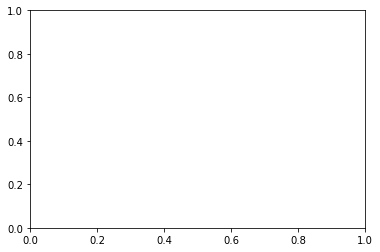

In [78]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
ax.plot(xk, custm.pmf(xk), 'ro', ms=12, mec='r')
ax.vlines(xk, 0, custm.pmf(xk), colors='r', lw=4)
plt.show()

TransferFunctionDiscrete(
array([0.16666667, 0.5       , 0.5       , 0.16666667]),
array([ 1.00000000e+00, -2.77555756e-16,  3.33333333e-01, -1.85037171e-17]),
dt: True
)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24.]
(array([[ 1.66666667e-01],
       [ 5.00000000e-01],
       [ 4.44444444e-01],
       [ 1.11022302e-16],
       [-1.48148148e-01],
       [-7.09309155e-17],
       [ 4.93827160e-02],
       [ 3.40519793e-17],
       [-1.64609053e-02],
       [-1.51092273e-17],
       [ 5.48696845e-03],
       [ 6.62657229e-18],
       [-1.82898948e-03],
       [-2.52207139e-18],
       [ 6.09663161e-04],
       [ 9.61157372e-19],
       [-2.03221054e-04],
       [-3.67066717e-19],
       [ 6.77403512e-05],
       [ 1.36661018e-19],
       [-2.25801171e-05],
       [-5.17652476e-20],
       [ 7.52670569e-06],
       [ 1.84315172e-20],
       [-2.50890190e-06]]),)


Text(0, 0.5, 'Amplitude')

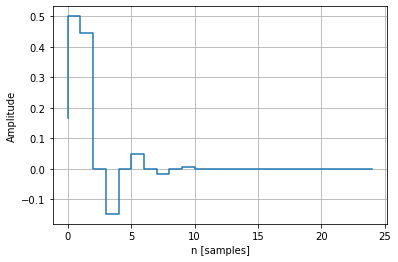

In [81]:
from scipy import signal
import matplotlib.pyplot as plt

butter = signal.dlti(*signal.butter(3, 0.5))
print(butter)
t, y = signal.dimpulse(butter, n=25)
print(t)
print(y)
plt.step(t, np.squeeze(y))
plt.grid()
plt.xlabel('n [samples]')
plt.ylabel('Amplitude')

In [82]:
x = np.array([[[0],[1],[2]]])
x.shape

(1, 3, 1)

In [85]:
x = np.squeeze(x)
x.shape

(3,)

In [84]:
x

array([[[0],
        [1],
        [2]]])

In [86]:
x

array([0, 1, 2])

In [87]:
import sympy as sym

ModuleNotFoundError: No module named 'sympy'

In [88]:
from numpy.random import normal

In [89]:
mu = 50
sigma = 5
n = 10

In [90]:
sample = normal(mu, sigma, n)
sample

array([48.73534298, 49.71530738, 44.06167413, 49.02213941, 57.92634854,
       43.77414998, 49.9519443 , 47.02491222, 45.41740538, 55.02788125])

In [91]:
from scipy.stats import norm
from matplotlib import pyplot as plt

In [92]:
mu = 50
sigma = 5

dist = norm(mu, sigma)
dist

In [93]:
values = [value for value in range(30, 70)]
p = [dist.pdf(value) for value in values]
p

[2.6766045152977075e-05,
 5.838938515829205e-05,
 0.00012238038602275437,
 0.00024644383369460396,
 0.0004768176402929681,
 0.0008863696823876015,
 0.0015830903165959937,
 0.002716593846737123,
 0.0044789060589685795,
 0.007094918569246285,
 0.010798193302637612,
 0.01579003166017883,
 0.02218416693589111,
 0.029945493127148975,
 0.0388372109966426,
 0.04839414490382867,
 0.05793831055229655,
 0.06664492057835994,
 0.07365402806066466,
 0.07820853879509118,
 0.07978845608028654,
 0.07820853879509118,
 0.07365402806066466,
 0.06664492057835994,
 0.05793831055229655,
 0.04839414490382867,
 0.0388372109966426,
 0.029945493127148975,
 0.02218416693589111,
 0.01579003166017883,
 0.010798193302637612,
 0.007094918569246285,
 0.0044789060589685795,
 0.002716593846737123,
 0.0015830903165959937,
 0.0008863696823876015,
 0.0004768176402929681,
 0.00024644383369460396,
 0.00012238038602275437,
 5.838938515829205e-05]

In [99]:
s = 0

for pr in p:
    s += pr
s

0.9999331193891283

In [94]:
len(sample), len(p)

(10, 40)

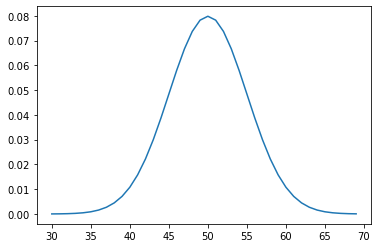

In [95]:
plt.plot(values, p)
plt.show()

In [96]:
cprobs = [dist.cdf(value) for value in values]
cprobs

[3.167124183311986e-05,
 7.234804392511998e-05,
 0.00015910859015753364,
 0.00033692926567688086,
 0.0006871379379158471,
 0.0013498980316300933,
 0.002555130330427932,
 0.004661188023718747,
 0.008197535924596131,
 0.013903447513498595,
 0.022750131948179195,
 0.03593031911292579,
 0.054799291699557974,
 0.08075665923377107,
 0.11506967022170822,
 0.15865525393145707,
 0.2118553985833967,
 0.2742531177500736,
 0.3445782583896758,
 0.42074029056089696,
 0.5,
 0.579259709439103,
 0.6554217416103242,
 0.7257468822499265,
 0.7881446014166034,
 0.8413447460685429,
 0.8849303297782918,
 0.9192433407662289,
 0.945200708300442,
 0.9640696808870742,
 0.9772498680518208,
 0.9860965524865014,
 0.9918024640754038,
 0.9953388119762813,
 0.997444869669572,
 0.9986501019683699,
 0.9993128620620841,
 0.9996630707343231,
 0.9998408914098424,
 0.9999276519560749]

In [97]:
len(sample), len(cprobs)

(10, 40)

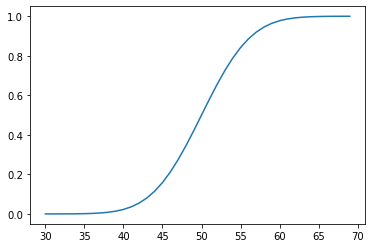

In [98]:
plt.plot(values, cprobs)
plt.show()

In [100]:
from scipy.stats import rv_continuous

In [11]:
weights_list

[array([ 0.00266169,  0.01388122, -0.00827199,  0.0037441 , -0.00714462,
         0.01873231, -0.01845019,  0.00599211, -0.02305068,  0.01480447,
        -0.0105967 ,  0.00407178, -0.0082887 , -0.0145935 , -0.00478433,
         0.01360093, -0.01018961, -0.00911073, -0.01108089, -0.00955492,
         0.00853396, -0.01795005, -0.00459042,  0.00919336, -0.00237523,
         0.0251998 ,  0.00244459, -0.01549909, -0.0014922 , -0.00407207,
        -0.00442805, -0.00101525,  0.01217816, -0.03129564, -0.00473172,
         0.00770023, -0.01851353,  0.0043851 , -0.00829744, -0.01701373],
       dtype=float32),
 array([-0.01369082,  0.01609316, -0.01434193,  0.00783316, -0.00732127,
         0.02860096, -0.01390649, -0.01678286,  0.01145206, -0.00429434,
         0.00223016, -0.01971715, -0.00967487,  0.01086835, -0.01208548,
         0.01166347, -0.0025683 , -0.00508024, -0.00431114, -0.00924534,
        -0.00699395,  0.00811382, -0.00906885, -0.01069098, -0.00080263,
         0.03209873, -0.020

In [13]:
wei

[[25, 5, 9, 1, 15, 32, 23, 20, 35, 7],
 [25, 5, 29, 1, 15, 8, 13, 35, 33, 21],
 [25, 5, 30, 35, 15, 2, 23, 33, 39, 10],
 [25, 5, 35, 28, 15, 20, 6, 14, 13, 4],
 [25, 5, 13, 9, 31, 15, 35, 26, 0, 29],
 [25, 2, 5, 35, 10, 24, 4, 15, 13, 8],
 [25, 5, 16, 35, 8, 3, 15, 34, 13, 26],
 [5, 25, 1, 15, 28, 9, 35, 33, 39, 14],
 [25, 5, 15, 29, 35, 26, 23, 34, 19, 18],
 [5, 22, 25, 35, 15, 33, 2, 9, 18, 30]]

In [14]:
for w in wei:
    w.sort()
    print(w)

[1, 5, 7, 9, 15, 20, 23, 25, 32, 35]
[1, 5, 8, 13, 15, 21, 25, 29, 33, 35]
[2, 5, 10, 15, 23, 25, 30, 33, 35, 39]
[4, 5, 6, 13, 14, 15, 20, 25, 28, 35]
[0, 5, 9, 13, 15, 25, 26, 29, 31, 35]
[2, 4, 5, 8, 10, 13, 15, 24, 25, 35]
[3, 5, 8, 13, 15, 16, 25, 26, 34, 35]
[1, 5, 9, 14, 15, 25, 28, 33, 35, 39]
[5, 15, 18, 19, 23, 25, 26, 29, 34, 35]
[2, 5, 9, 15, 18, 22, 25, 30, 33, 35]


In [15]:
df

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,417017.0,476879.0,493486.0,431167.0,188138.0,27950.3,381723.0,546312.0,577482.0,488452.0,...,443348.0,491934.0,495627.0,417980.0,159484.0,56405.0,396093.0,548100.0,567573.0,463988.000000
1,414019.0,477523.0,493704.0,431222.0,188293.0,27793.4,381659.0,546247.0,577270.0,487986.0,...,443493.0,492009.0,495642.0,417975.0,159499.0,56368.9,396055.0,548106.0,567663.0,464173.000000
2,410925.0,478188.0,493929.0,431278.0,188454.0,27631.4,381592.0,546179.0,577051.0,487504.0,...,443643.0,492087.0,495657.0,417970.0,159516.0,56331.7,396016.0,548113.0,567757.0,464365.000000
3,407894.0,478839.0,494149.0,431334.0,188610.0,27472.8,381526.0,546113.0,576837.0,487033.0,...,443790.0,492163.0,495672.0,417965.0,159532.0,56295.2,395978.0,548119.0,567849.0,464552.000000
4,404847.0,479493.0,494371.0,431390.0,188768.0,27313.2,381460.0,546046.0,576622.0,486558.0,...,443937.0,492239.0,495687.0,417960.0,159548.0,56258.6,395939.0,548125.0,567941.0,464741.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,445149.0,490794.0,495010.0,428504.0,190001.0,22033.3,377081.0,550573.0,590010.0,499103.0,...,371315.0,450695.0,481250.0,414543.0,151422.0,65878.1,412298.0,615059.0,711784.0,26114.700000
3997,445562.0,490998.0,495033.0,428465.0,190028.0,21946.4,377013.0,550635.0,590194.0,499259.0,...,370258.0,450090.0,481039.0,414492.0,151302.0,66018.6,412539.0,616044.0,713901.0,19681.900000
3998,445980.0,491205.0,495056.0,428426.0,190056.0,21858.6,376944.0,550698.0,590379.0,499417.0,...,369189.0,449478.0,480825.0,414440.0,151181.0,66160.9,412783.0,617042.0,716044.0,13172.300000
3999,446400.0,491413.0,495079.0,428386.0,190084.0,21770.0,376874.0,550762.0,590567.0,499577.0,...,368112.0,448861.0,480610.0,414388.0,151060.0,66304.2,413028.0,618047.0,718203.0,6613.540000


In [5]:
x

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]